# Solar Irradiance Prediction
## Comparing Lasso, Ridge and (L2 with standard LinearRegression and GD)


In [11]:
# for reading mat files
from scipy.io import loadmat
from time import perf_counter

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# work with data libraries
import numpy as np
import numpy.linalg as lin

# data visualization libraries
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge,Lasso

In [12]:
# Step 1: Load the generated weather data
weather_data = pd.read_csv('iworoko_weather_data_fixed.csv')

# Step 2: Feature selection - Using Temperature, Humidity, WindSpeed, CloudCover, Rainfall as features
X = weather_data[['Temperature', 'Humidity', 'WindSpeed', 'CloudCover', 'Rainfall']]

# Target variable: SolarIrradiance
y = weather_data['SolarIrradiance']
X_train, X_test = data['tra_X_tr'][0], data['tra_X_te'][0]
y_train, y_test = data['tra_Y_tr'], data['tra_Y_te']

# all locations separated
# this function extract the time series of a chosen location on data X
def make_X (X, location):
    x = []
    for timestamp in X:
        timestamp = timestamp.toarray()
        x.append(timestamp[location])
    return np.array(x)

# train, validation and test data
timeseries = np.array([make_X(X_train, i) for i in range(36)])
timeseries_test = np.array([make_X(X_test, i) for i in range(36)])

# scaling
for i in range(36):
    scaler=StandardScaler()
    scaler.fit(timeseries[i])
    timeseries[i]=scaler.transform(timeseries[i])
    timeseries_test[i]=scaler.transform(timeseries_test[i])

# timeline for single location, split into training (later split to train and validation), test
timeline = np.array([i for i in range(1261)])
    
timeline_test=np.arange(1261,2101)

# dimensionality of given Data 
D=timeseries.shape[2]
T=timeseries.shape[1]

# data for one location, including a column for the bias
j=10 # index of chosen location
X=np.insert(timeseries[j],0,np.ones(T),axis=1)
X_test = np.insert(timeseries_test[j],0,np.ones(840),axis=1)

y = y_train[j].reshape(-1,1)
y_test = y_test[j]


In [13]:
def func(X,y,theta,lam):
    n=len(y)
    return 1/n * np.matmul(np.transpose(np.matmul(X,theta)-y),np.matmul(X,theta)-y) + lam*np.matmul(np.transpose(theta),theta)

def grad(X,y,theta,lam):
    n=len(y)
    if n==0:
        print('n is zero')
    return 2/n * np.matmul(np.transpose(X),np.matmul(X,theta)-y) + 2*lam*theta


Validation loop  0
Lasso loop  0
Lasso loop  1
Lasso loop  2
Lasso loop  3
Lasso loop  4
Validation loop  1
Lasso loop  0


C:\Users\dayoo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.076e-04, tolerance: 3.721e-05
  model = cd_fast.enet_coordinate_descent(
C:\Users\dayoo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.853e-04, tolerance: 3.620e-05
  model = cd_fast.enet_coordinate_descent(
C:\Users\dayoo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.952e-04, toleranc

Lasso loop  1
Lasso loop  2
Lasso loop  3
Lasso loop  4
Validation loop  2
Lasso loop  0
Lasso loop  1
Lasso loop  2
Lasso loop  3
Lasso loop  4
Validation loop  3
Lasso loop  0
Lasso loop  1
Lasso loop  2
Lasso loop  3
Lasso loop  4
Validation loop  4
Lasso loop  0


C:\Users\dayoo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.058e-04, tolerance: 3.686e-05
  model = cd_fast.enet_coordinate_descent(
C:\Users\dayoo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.700e-04, tolerance: 3.612e-05
  model = cd_fast.enet_coordinate_descent(


Lasso loop  1
Lasso loop  2
Lasso loop  3
Lasso loop  4
Validation loop  5
Lasso loop  0
Lasso loop  1
Lasso loop  2
Lasso loop  3
Lasso loop  4
Validation loop  6
Lasso loop  0
Lasso loop  1
Lasso loop  2
Lasso loop  3
Lasso loop  4


C:\Users\dayoo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.866e-04, tolerance: 3.566e-05
  model = cd_fast.enet_coordinate_descent(
C:\Users\dayoo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.756e-04, tolerance: 3.717e-05
  model = cd_fast.enet_coordinate_descent(
C:\Users\dayoo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.971e-04, toleranc

Validation loop  7
Lasso loop  0
Lasso loop  1
Lasso loop  2
Lasso loop  3
Lasso loop  4
Validation loop  8
Lasso loop  0
Lasso loop  1
Lasso loop  2
Lasso loop  3
Lasso loop  4
Validation loop  9
Lasso loop  0


C:\Users\dayoo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.882e-04, tolerance: 3.668e-05
  model = cd_fast.enet_coordinate_descent(
C:\Users\dayoo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.839e-04, tolerance: 3.675e-05
  model = cd_fast.enet_coordinate_descent(


Lasso loop  1
Lasso loop  2
Lasso loop  3
Lasso loop  4


NameError: name 'theta' is not defined

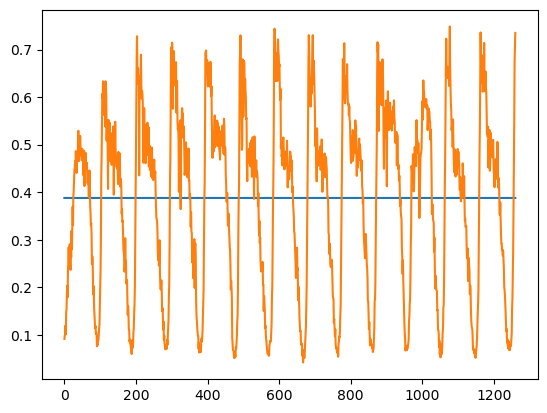

<Figure size 640x480 with 0 Axes>

In [14]:
# random initialisation theta
theta_init=np.random.rand(X.shape[1],1)

# lambda
lam_list=[0,0.0001, 0.001, 0.01, 0.1]
alpha_list=[0.0001,0.001, 0.01, 0.1, 1] 
error = np.zeros(5)
error_lasso = np.zeros(5)

# Cross-Validation dauert seeeehr lange
kCV=10

start=perf_counter()

for k in range(kCV):
    print('Validation loop ',k)
    
    indices=np.arange(1261)
    np.random.shuffle(indices)
    indices_train=indices[:1000]
    indices_val=indices[1000:]
    
    X_tr=X[indices_train,:]
    y_tr=y[indices_train]
    X_val=X[indices_val,:]
    y_val=y[indices_val]
    
    """
    for i in range(len(lam_list)): # grid search for best lambda
        print('Gradient loop ',i)
        lam=lam_list[i]

        #choosing optimal alpha
        e,_ = np.linalg.eig((2/1000)*np.matmul(np.transpose(X_tr),X_tr) + 2*lam*np.eye(X_tr.shape[1]));

        U = np.max(e);
        L = np.min(e);
        alpha = 2/(U+L)


        theta = theta_init.copy()

        delta=np.Inf

        obj_val=[]
        obj_val.append(func(X_tr,y_tr,theta,lam))

        while delta>1e-6:
        #for i in range(1000):
                gradient = grad(X_tr,y_tr,theta,lam)
                theta -= alpha * gradient
                obj_val.append(func(X_tr,y_tr,theta,lam))
                delta = obj_val[-2]-obj_val[-1]

        error[i]+=mean_squared_error(y_val,np.matmul(X_val,theta)) #np.sum((y_val-np.matmul(X_val,theta))**2)/261
    """
    for i in range(len(alpha_list)): # bestes model merken
        print('Lasso loop ',i)
        model=Lasso(alpha=alpha_list[i], tol=1e-6)
        model.fit(X_tr,y_tr)
        error_lasso[i]+=mean_squared_error(y_val,model.predict(X_val)) #np.sum((y_val-model.predict(X_val))**2)/261
      
        
plt.figure()
plt.plot(timeline, model.predict(X))
plt.plot(timeline, y)

plt.figure()
plt.plot(timeline, np.matmul(X,theta))
plt.plot(timeline, y)

end =perf_counter()
execution_time =(end-start)

error/=kCV
error_lasso/=kCV
print(error)
print(error_lasso)
print(execution_time)

0.004800588825978814
0.0038698531485693516
0.0020880636111539155
0.0018301733384146473


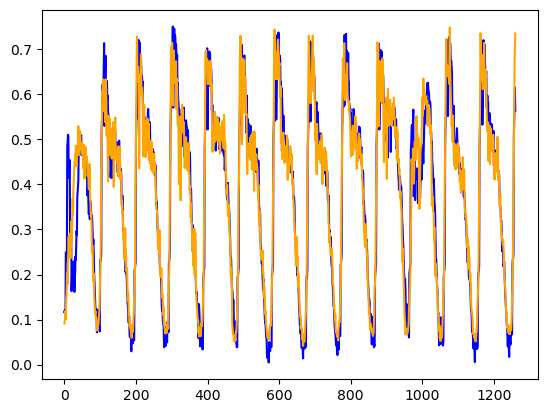

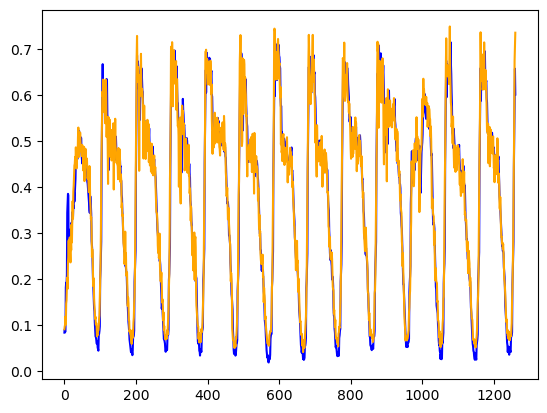

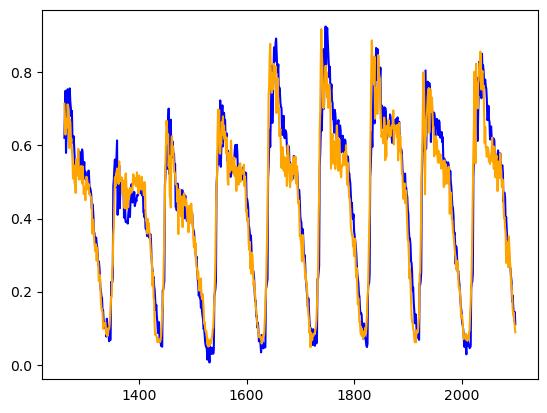

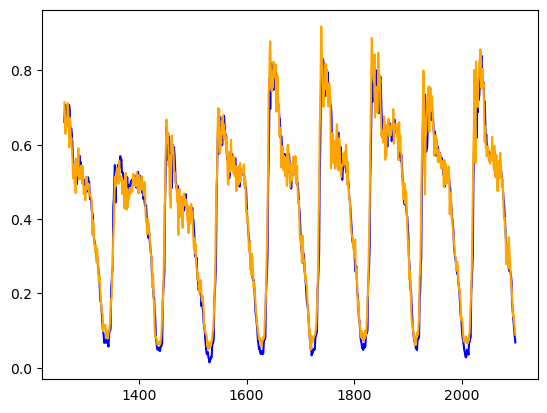

In [15]:
# parameters for best model (position of minimal value from above)
best_lambda=lam_list[3]
best_alpha=alpha_list[0]

# evaluate accuracy with root mean squared error
# only on test data

model=Lasso(alpha=best_alpha,tol=12-6)
model.fit(X,y)
rmse_lasso=mean_squared_error(y_test,model.predict(X_test))
rmse_lasso_train=mean_squared_error(y,model.predict(X))

#choosing optimal alpha / optimum learning rate
e,_ = np.linalg.eig((2/1261)*np.matmul(np.transpose(X),X) + 2*best_lambda*np.eye(X.shape[1]));

U = np.max(e);
L = np.min(e);
alpha = 2/(U+L)


theta = theta_init.copy()

delta=np.Inf

obj_val=[]
obj_val.append(func(X,y,theta,best_lambda))

while delta>1e-6:
#for i in range(1000):
        gradient = grad(X,y,theta,best_lambda)
        theta -= alpha * gradient
        obj_val.append(func(X,y,theta,best_lambda))
        delta = obj_val[-2]-obj_val[-1]

rmse_l2=mean_squared_error(y_test,np.matmul(X_test,theta))
rmse_l2_train=mean_squared_error(y,np.matmul(X,theta))

print(rmse_lasso)
print(rmse_lasso_train)
print(rmse_l2)
print(rmse_l2_train)

plt.figure()
plt.plot(timeline, model.predict(X),color='blue')
plt.plot(timeline, y,color='orange')

plt.figure()
plt.plot(timeline, np.matmul(X,theta),color='blue')
plt.plot(timeline, y,color='orange')

plt.figure()
plt.plot(timeline_test, model.predict(X_test),color='blue')
plt.plot(timeline_test, y_test,color='orange')

plt.figure()
plt.plot(timeline_test, np.matmul(X_test,theta),color='blue')
plt.plot(timeline_test, y_test,color='orange')

0.06928628165790696
0.04569533467602481


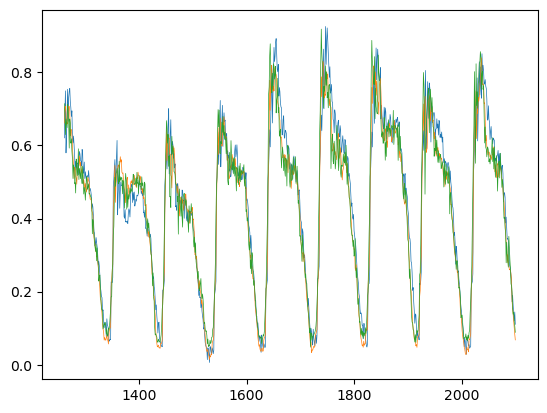

In [16]:
model.predict(X_test[18,:].reshape(1,-1))
plt.plot(timeline_test,model.predict(X_test),linewidth=0.5)
plt.plot(timeline_test,np.matmul(X_test,theta),linewidth=0.5)
plt.plot(timeline_test,y_test,linewidth=0.5)

print(np.sqrt(mean_squared_error(y_test,model.predict(X_test))))
print(np.sqrt(mean_squared_error(y_test,np.matmul(X_test,theta))))